In [2]:
import pydot
import matplotlib.pyplot as plt
import time
import math
import random
import numpy as np

In [3]:
def get_data(dot_file_path): #nodes,edges,node_list,edge_list,weights
    '''Returns the nodes, edges (both in pydot format), a list with all the nodes and another with all the edges, and also a dic with (edge):weigth
    '''
     #= 'Datasets/LesMiserables.dot'
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()
    graph = pydot.graph_from_dot_data(dot_data)

    nodes = graph[0].get_nodes()
    edges = graph[0].get_edges()
    
    node_list = [node.get_name() for node in nodes]
    edge_list = [(edge.get_source(), edge.get_destination()) for edge in edges]
    weights = {}
    if edges[0].get_attributes()!={}:
        name= str(list(edges[0].get_attributes().keys())[0])
        weights = {(edge.get_source(), edge.get_destination()):int(edge.get_attributes()[name]) for edge in edges}

    return nodes,edges,node_list,edge_list,weights

In [4]:
nodes,edges,node_list,edge_list,weights = get_data('Datasets/LesMiserables.dot')

print("nodes", nodes)
print("edges", nodes)
print("node_list", node_list)
print("edges_list", edge_list)
print("weights", weights)

nodes [<pydot.core.Node object at 0x000001CF1B9555D0>, <pydot.core.Node object at 0x000001CF1B9643D0>, <pydot.core.Node object at 0x000001CF1B966470>, <pydot.core.Node object at 0x000001CF1B970550>, <pydot.core.Node object at 0x000001CF1B9725F0>, <pydot.core.Node object at 0x000001CF1B978610>, <pydot.core.Node object at 0x000001CF1B97A6B0>, <pydot.core.Node object at 0x000001CF1B984790>, <pydot.core.Node object at 0x000001CF1B986830>, <pydot.core.Node object at 0x000001CF1B98C910>, <pydot.core.Node object at 0x000001CF1B98E9B0>, <pydot.core.Node object at 0x000001CF1B998A90>, <pydot.core.Node object at 0x000001CF1B99AB30>, <pydot.core.Node object at 0x000001CF1B9A0C40>, <pydot.core.Node object at 0x000001CF1B9A2CB0>, <pydot.core.Node object at 0x000001CF1B9ACD90>, <pydot.core.Node object at 0x000001CF1B9AEE30>, <pydot.core.Node object at 0x000001CF1B9B4F10>, <pydot.core.Node object at 0x000001CF1B9B6FB0>, <pydot.core.Node object at 0x000001CF1B9C1090>, <pydot.core.Node object at 0x0000

In [5]:
def compute_similarity_matrix(node_list, edge_list, weights):
    edge_weights = {(u, v): weight for (u, v), weight in weights.items()}

    num_nodes = len(node_list)
    distances = np.zeros((num_nodes, num_nodes))
    for i, source in enumerate(node_list):
        for j, target in enumerate(node_list):
            if i != j:
                if (source, target) in edge_weights:
                    distances[i, j] = edge_weights[(source, target)]
                elif (target, source) in edge_weights:
                    distances[i, j] = edge_weights[(target, source)]
                else:
                    distances[i, j] = np.inf

    similarities = np.zeros((num_nodes, num_nodes))
    for u, v in edge_list:
        i = node_list.index(u)
        j = node_list.index(v)
        similarities[i, j] = 1 / (1 + distances[i, j])
        similarities[j, i] = similarities[i, j]  # Similarity matrix is symmetric

    np.fill_diagonal(similarities, 1) #diagonal 1

    return similarities

similarity_matrix = compute_similarity_matrix(node_list, edge_list, weights)

print("Similarity matrix:")
print("\t" + "\t".join(node_list))
for i in range(len(node_list)):
    print(node_list[i], "\t", end="")
    for j in range(len(node_list)):
        print("{:.2f}".format(similarity_matrix[i, j]), "\t", end="")
    print()


Similarity matrix:
	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	24	25	26	27	28	29	30	32	33	34	35	36	37	38	39	44	45	49	50	52	56	59	65	69	70	71	72	73	17	18	19	20	21	22	23	31	42	43	51	40	41	76	55	46	53	58	63	47	48	60	61	62	64	66	67	74	75	77	57	54	68
1 	1.00 	0.50 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	
2 	0.50 	1.00 	0.11 	0.09 	0.50 	0.50 	0.50 	0.50 	0.33 	0.50 	0.17 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0

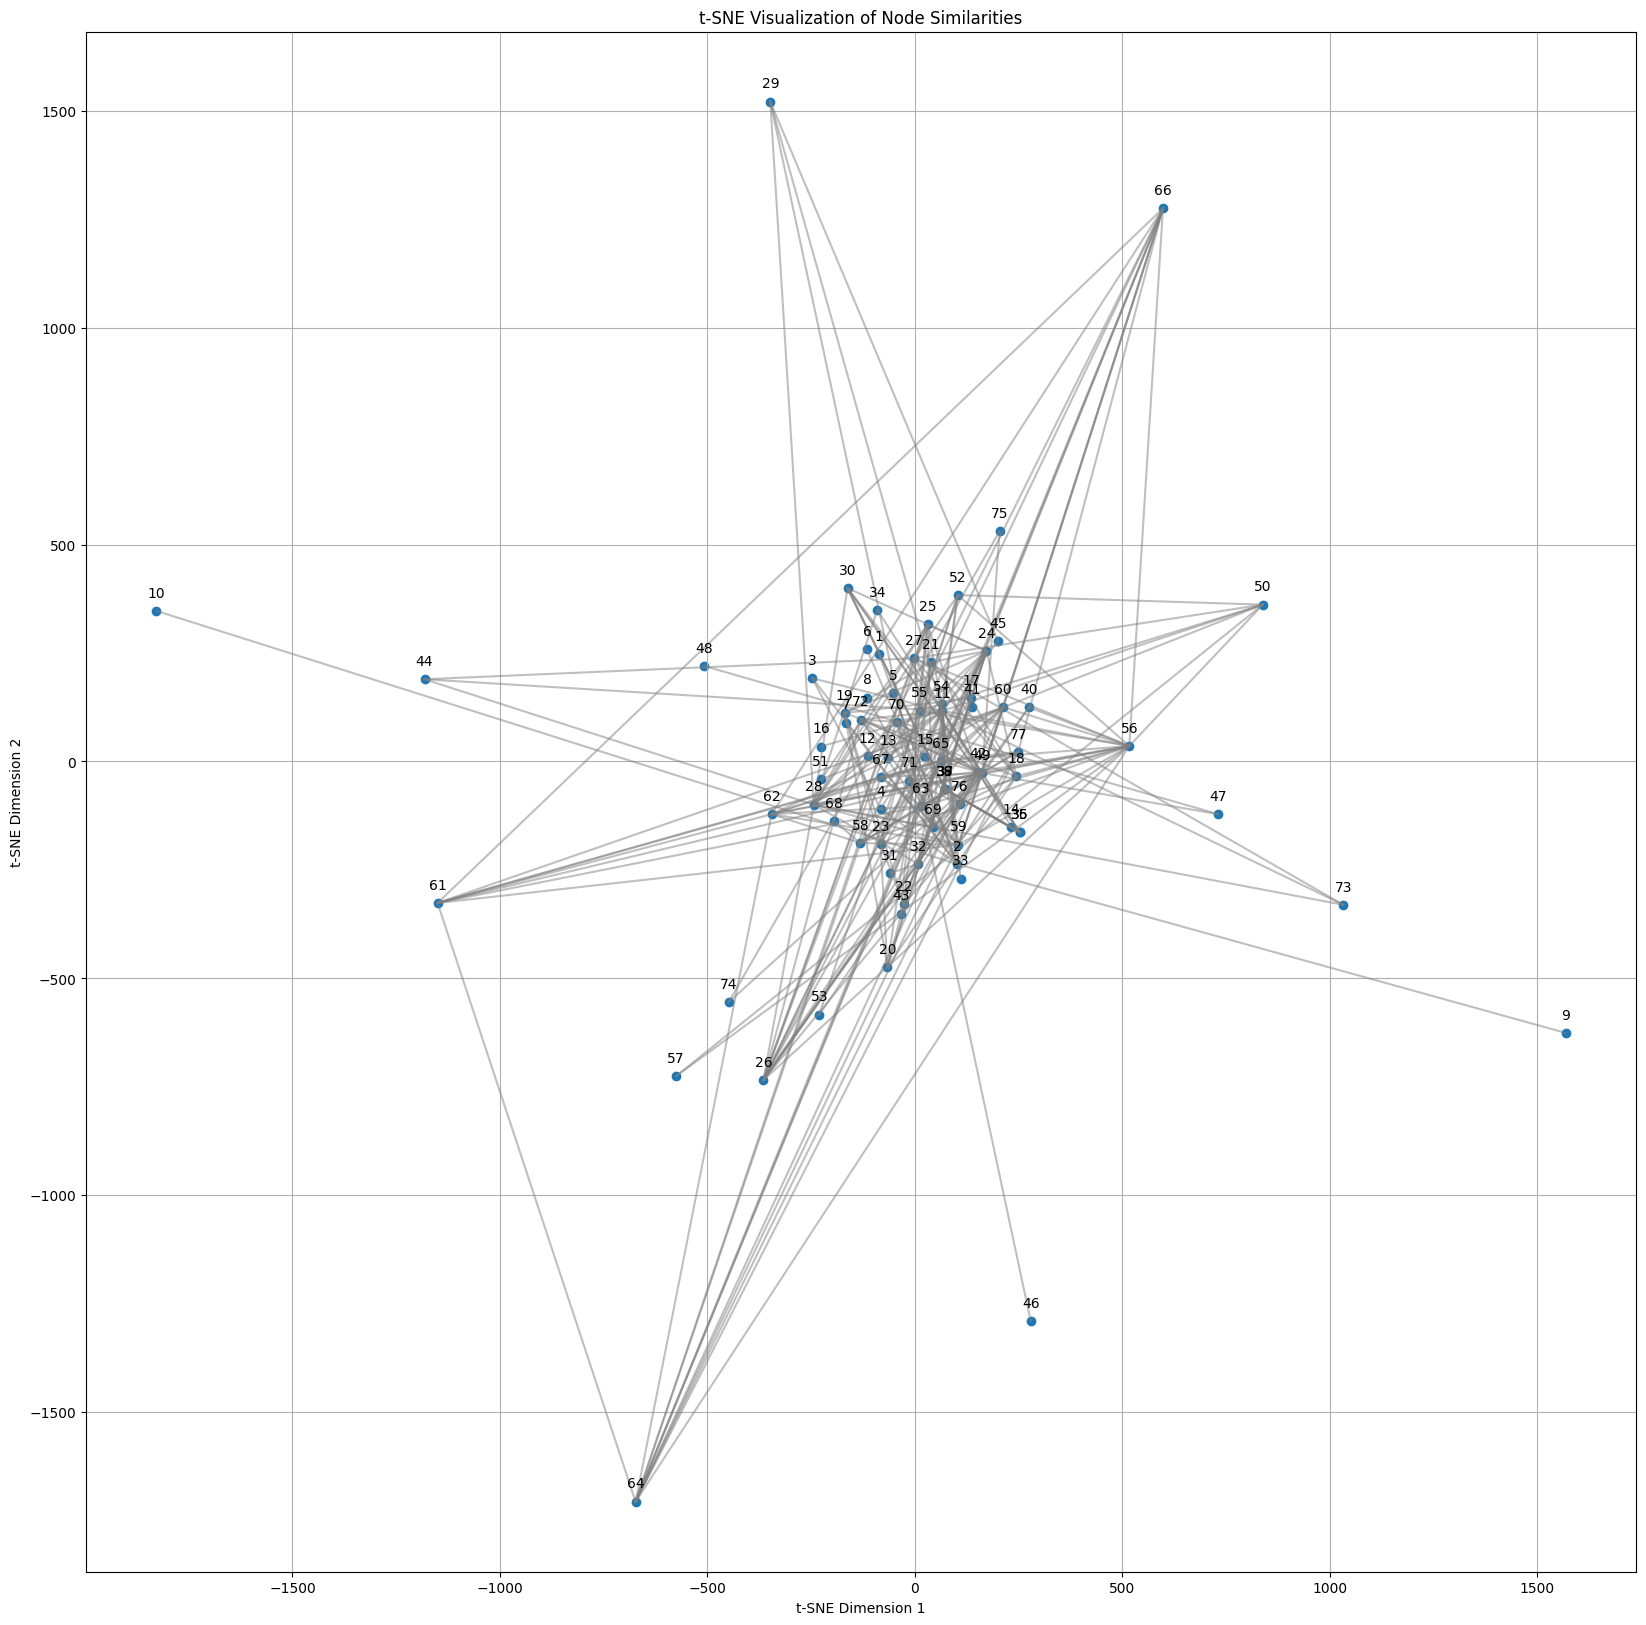

In [6]:
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

def plot_tsne(similarities, node_list, edge_list, perplexity=10, learning_rate=300, n_iter=1000, interactive=False):  
    tsne = TSNE(n_components=3, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter)
    embeddings = tsne.fit_transform(1 - similarities)

    label_map = {label: i for i, label in enumerate(np.unique(node_list))}
    #node_colors = [label_map[label] for label in node_list]

    plt.figure(figsize=(20, 20))
    plt.scatter(embeddings[:, 0], embeddings[:, 1]) # c=node_colors, cmap='viridis'
    #plt.colorbar(label='Node Label')

    for edge in edge_list:
        u, v = edge
        u_index = node_list.index(u)
        v_index = node_list.index(v)
        plt.plot([embeddings[u_index, 0], embeddings[v_index, 0]], 
                 [embeddings[u_index, 1], embeddings[v_index, 1]], 
                 color='gray', alpha=0.5)

    for i, node_number in enumerate(node_list):
        plt.annotate(node_number, (embeddings[i, 0], embeddings[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title('t-SNE Visualization of Node Similarities')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.grid(True)
    plt.show()

    if interactive:
        trace = go.Scatter3d(
            x=embeddings[:, 0],
            y=embeddings[:, 1],
            z=embeddings[:, 2],
            mode='markers',
            text=node_list,
            hoverinfo='text',
            marker=dict(
                size=5,
                color=[label_map[label] for label in node_list],
                colorscale='Viridis',
                opacity=0.8
            )
        )

        layout = go.Layout(
            scene=dict(
                xaxis=dict(title='t-SNE Dimension 1'),
                yaxis=dict(title='t-SNE Dimension 2'),
                zaxis=dict(title='t-SNE Dimension 3')
            ),
            margin=dict(l=0, r=0, b=0, t=0)
        )

        fig = go.Figure(data=[trace], layout=layout)
        fig.show()

plot_tsne(similarity_matrix, node_list, edge_list, interactive=True)

C:\Users\Magnus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



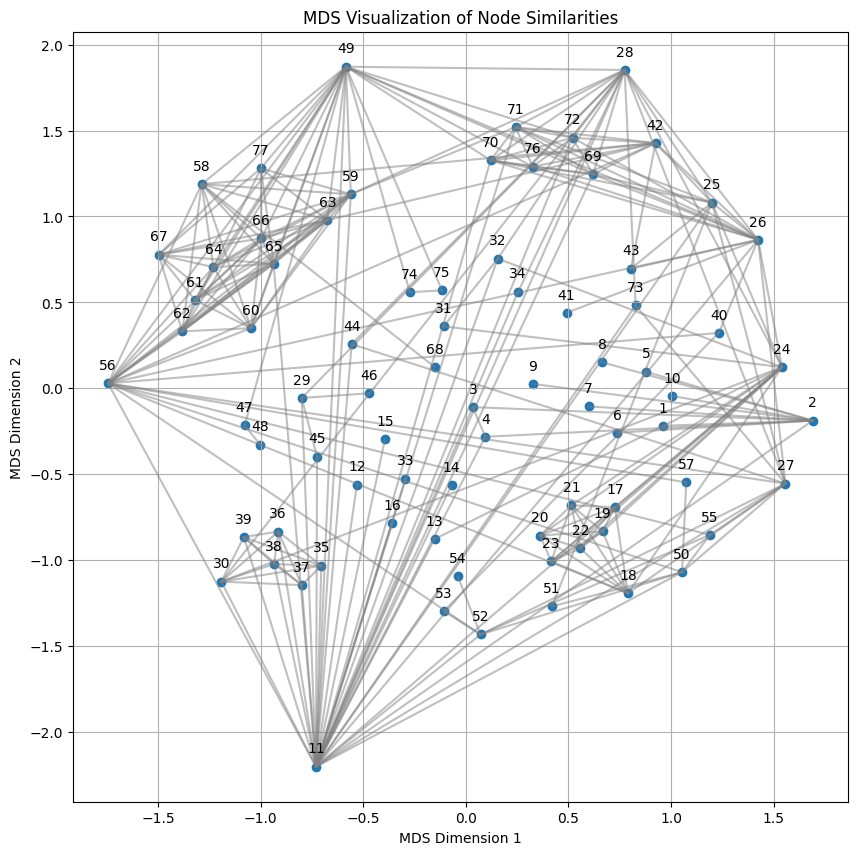

In [9]:
from sklearn.manifold import MDS
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

def plot_mds(similarities, node_list, edge_list, n_components=2, interactive=False):  
    mds = MDS(n_components=n_components)
    embeddings = mds.fit_transform(1 - similarities)

    label_map = {label: i for i, label in enumerate(np.unique(node_list))}

    plt.figure(figsize=(10, 10))
    plt.scatter(embeddings[:, 0], embeddings[:, 1])

    for edge in edge_list:
        u, v = edge
        u_index = node_list.index(u)
        v_index = node_list.index(v)
        plt.plot([embeddings[u_index, 0], embeddings[v_index, 0]], 
                 [embeddings[u_index, 1], embeddings[v_index, 1]], 
                 color='gray', alpha=0.5)

    for i, node_number in enumerate(node_list):
        plt.annotate(node_number, (embeddings[i, 0], embeddings[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title('MDS Visualization of Node Similarities')
    plt.xlabel('MDS Dimension 1')
    plt.ylabel('MDS Dimension 2')
    plt.grid(True)
    plt.show()

    if interactive:
        trace = go.Scatter(
            x=embeddings[:, 0],
            y=embeddings[:, 1],
            mode='markers',
            text=node_list,
            hoverinfo='text',
            marker=dict(
                size=5,
                color=[label_map[label] for label in node_list],
                colorscale='Viridis',
                opacity=0.8
            )
        )

        layout = go.Layout(
            xaxis=dict(title='MDS Dimension 1'),
            yaxis=dict(title='MDS Dimension 2'),
            margin=dict(l=0, r=0, b=0, t=0)
        )

        fig = go.Figure(data=[trace], layout=layout)
        fig.show()

# Example usage
plot_mds(similarity_matrix, node_list, edge_list, n_components=2, interactive=True)
